In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5
# baselevel_p = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['P'].to_numpy()[0]
# perfomances_dt5['P_dlt'] = perfomances_dt5['P']-baselevel_p
# # CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
# baselevel_y = perfomances_dt5[(perfomances_dt5['NRT'] == 'static') & (perfomances_dt5['policy'] == 'leach_0')]['Y_corn'].to_numpy()[0]
# perfomances_dt5['Y_corn_pct'] = perfomances_dt5['Y_corn']/baselevel_y

# # #Keep change in Y >= 95%
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] >= 0.95]
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['Y_corn_pct'] <= 1.05]

# # #Calculate ag-sector cost
# perfomances_dt5['C'] = - perfomances_dt5['P_dlt'] - perfomances_dt5['G']
perfomances_dt5['policy_cost'] = -perfomances_dt5['policy_cost']
perfomances_dt5['L_change'] = -perfomances_dt5['L_change']
# perfomances_dt5[perfomances_dt5['policy_name'] == 'ratio']
perfomances_dt5

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,static,12673.739051,42.451743,187.175828,1643.300388,0.000000,-0.0,1643.300388,-0.000000,5.0,ratio
1,ratio_5,dynamic,12629.274130,40.120596,177.216585,1644.046769,0.000000,5.5,1644.046769,0.746381,5.0,ratio
2,ratio_6,static,12619.606850,39.874544,177.681350,1617.492625,24.875389,6.1,1642.368014,-0.932374,6.0,ratio
3,ratio_6,dynamic,12587.998774,38.360101,170.776774,1618.867338,23.908748,9.6,1642.776086,-0.524301,6.0,ratio
4,ratio_7,static,12619.036222,39.697501,177.175828,1593.032760,49.609232,6.5,1642.641992,-0.658396,7.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
167,red_24,dynamic,12043.442101,30.737765,134.200799,1592.141335,0.000000,27.6,1592.141335,-51.159053,24.0,red
168,red_25,static,12113.440304,31.703381,139.741336,1598.062708,0.000000,25.3,1598.062708,-45.237680,25.0,red
169,red_26,static,12113.440304,31.703381,139.741336,1598.062708,0.000000,25.3,1598.062708,-45.237680,26.0,red
170,red_27,static,12044.348675,30.972254,136.022406,1590.993130,0.000000,27.0,1590.993130,-52.307257,27.0,red


In [3]:
# perfomances_dt5 = perfomances_dt5[perfomances_dt5['L_change'] >= 0]
perfomances_dt5 = perfomances_dt5.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'static')]
leach_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'static')]
nred_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'static')]
bal_1_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'static')]

ratio_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'ratio') & (perfomances_dt5['NRT'] == 'dynamic')]
leach_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'leach') & (perfomances_dt5['NRT'] == 'dynamic')]
nred_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'red') & (perfomances_dt5['NRT'] == 'dynamic')]
bal_2_dt = perfomances_dt5[(perfomances_dt5['policy_name'] == 'bal') & (perfomances_dt5['NRT'] == 'dynamic')]

nred_2_dt

,policy,NRT,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
101,red_0,dynamic,12628.979910,40.131979,177.219640,1644.003439,0.0,5.5,1644.003439,0.703052,0.0,red
103,red_1,dynamic,12628.979910,40.131979,177.219640,1644.003439,0.0,5.5,1644.003439,0.703052,1.0,red
105,red_2,dynamic,12628.975533,40.131443,177.218042,1644.003945,0.0,5.5,1644.003945,0.703558,2.0,red
107,red_3,dynamic,12581.049065,38.167162,169.968591,1642.368855,0.0,10.1,1642.368855,-0.931532,3.0,red
109,red_4,dynamic,12559.663649,37.577882,167.462014,1641.129501,0.0,11.5,1641.129501,-2.170887,4.0,red
111,red_5,dynamic,12557.292678,37.544233,167.256645,1640.941324,0.0,11.6,1640.941324,-2.359064,5.0,red
113,red_6,dynamic,12556.702885,37.540857,167.222385,1640.882735,0.0,11.6,1640.882735,-2.417653,6.0,red
115,red_7,dynamic,12554.842447,37.436208,166.912310,1640.839325,0.0,11.8,1640.839325,-2.461062,7.0,red
117,red_8,dynamic,12519.931815,36.415153,163.065039,1638.644927,0.0,14.2,1638.644927,-4.655461,8.0,red
119,red_9,dynamic,12485.076298,35.764203,159.968591,1635.932668,0.0,15.8,1635.932668,-7.367720,9.0,red


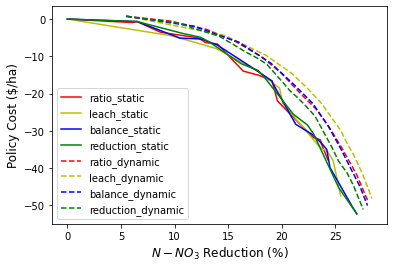

In [4]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['policy_cost'], color = 'r', label = 'ratio_static')
ax.plot(leach_1_dt['L_change'], leach_1_dt['policy_cost'], color = 'y', label = 'leach_static')
ax.plot(bal_1_dt['L_change'], bal_1_dt['policy_cost'], color = 'b', label = 'balance_static')
ax.plot(nred_1_dt['L_change'], nred_1_dt['policy_cost'], color = 'g', label = 'reduction_static')

ax.plot(ratio_2_dt['L_change'], ratio_2_dt['policy_cost'], linestyle='dashed', color = 'r',  label = 'ratio_dynamic')
ax.plot(leach_2_dt['L_change'], leach_2_dt['policy_cost'], linestyle='dashed', color = 'y', label = 'leach_dynamic')
ax.plot(bal_2_dt['L_change'], bal_2_dt['policy_cost'], linestyle='dashed', color = 'b', label = 'balance_dynamic')
ax.plot(nred_2_dt['L_change'], nred_2_dt['policy_cost'], linestyle='dashed', color = 'g', label = 'reduction_dynamic')


plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Policy Cost ($/ha)", size = 12)
#ax.set_xticks((np.arange(0, 30, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.pdf"
plt.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policy_cost.png"
plt.savefig(plot_file_name, dpi=300)